In [23]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from glob import glob
from astropy import units as u
from astropy import constants as c

In [26]:
def PlotMap(map_npz):
    #plt.figure(figsize=(8,8))
    eli = map_npz['eli']
    azi = map_npz['azi']
    zi = map_npz['zi']
    plt.imshow(np.flipud(zi),aspect='auto',cmap=plt.cm.jet,
               extent=[eli.min(),eli.max(),azi.min(),azi.max()])
    plt.colorbar()
    #CS = plt.contour(zi,5,linewidths=1,colors='w')
    plt.contour(eli,azi,zi,5,linewidths=1,colors='w')
    #CS = plt.contourf(eli,azi,zi,10,cmap=plt.cm.jet)
    plt.axis('equal')
    #plt.show()
    return

def MakeHealpixAzElMap(az,el,pwr,nside=64):
    """ Avoid dealing with RA/Dec conversion just yet """
    npix = hp.nside2npix(nside)
    hpmap = np.zeros(npix)
    # Az is already (0,360).  El should be 0 at horizon.  So:
    phi = np.radians(az)
    theta = np.radians(90.-el)
    pixels = hp.ang2pix(nside,theta,phi)
    whpix = set(pixels)
    for p in whpix:
        #hpmap[p] = np.median(pwr[pixels==p])
        hpmap[p] = np.mean(pwr[pixels==p])
    #hpmap = hp.smoothing(hpmap,fwhm=np.radians(2.5))
    return hpmap  

def Mappit(map_file):
    map_npz = np.load(map_file)
    mp = MakeHealpixAzElMap(map_npz['az'],map_npz['el'],map_npz['pwr'])

    plt.figure(figsize=(20,6))
    plt.subplot(131)
    plt.plot(map_npz['az'],map_npz['pwr'])
    plt.grid()
    plt.subplot(132)
    plt.plot(map_npz['el'],map_npz['pwr'],'.')
    plt.grid()
    plt.subplot(133)
    PlotMap(map_npz)
    plt.show()

    name = map_file
    hp.orthview(mp,half_sky=True,rot=[180,90],title='',margins=[0,0,1,1],flip='geo')#,sub = (1,2,1))
    hp.graticule(dpar=10,dmer=30,color='white')
    plt.text(1.01,-0.03,'E',color='black',fontsize=12)
    plt.text(-0.03,1.03,'N',color='black',fontsize=12)
    plt.text(-1.1,-0.03,'W',color='black',fontsize=12)
    plt.text(-0.03,-1.1,'S',color='black',fontsize=12)
    plt.savefig('mrt_'+name+'_orth.png')
    fov = 20.*u.deg
    reso = 60.*u.arcmin
    xsize = int((fov/reso).to(u.dimensionless_unscaled))
    hp.gnomview(mp,rot=[map_npz['az'].mean(),map_npz['el'].mean()],xsize=xsize,reso=reso.to(u.arcmin).value,title='')#,sub = (1,2,2))
    hp.graticule(color='white',dpar=2.,dmer=2.)
    plt.savefig('mrt_'+name+'_gnom.png')
    
    return

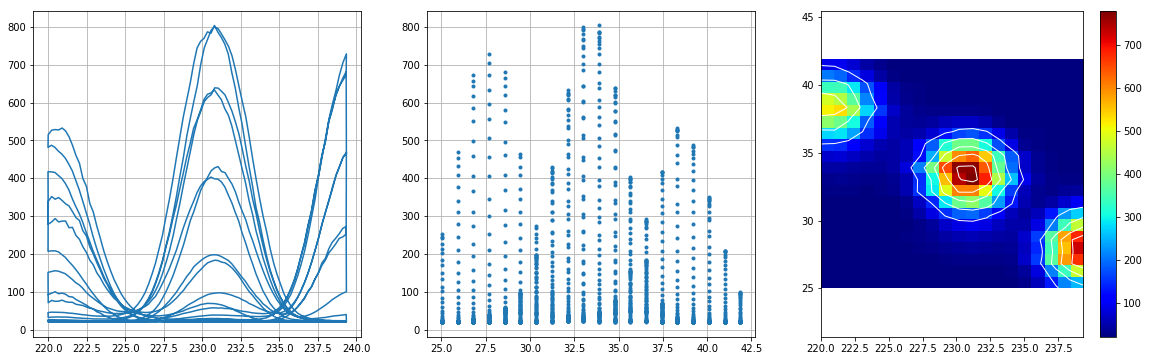

0.0 180.0 -180.0 180.0
The interval between parallels is 10 deg 0.00'.
The interval between meridians is 30 deg -0.00'.
76.80338855418589 103.19661144581411 -13.196611445814117 13.196611445814117
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 2 deg 0.00'.


/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:387: RuntimeWarning: invalid value encountered in greater
  w=np.where(d2 > threshold)[0]
/anaconda3/lib/python3.6/site-packages/healpy/projector.py:750: RuntimeWarning: invalid value encountered in greater
  mask = (np.asarray(x)**2+np.asarray(y)**2>1.0)


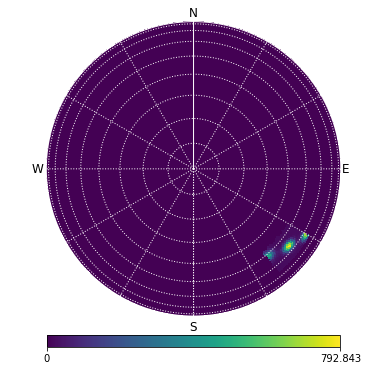

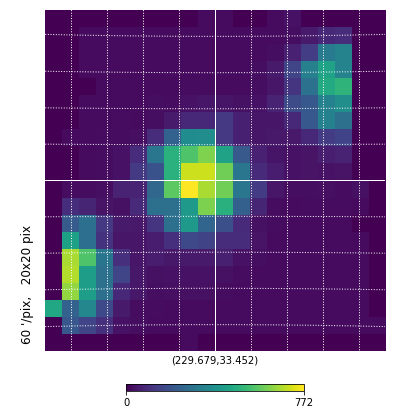

In [32]:
Mappit('map_Fri_Jun_15_15:16:41_2018.npz')

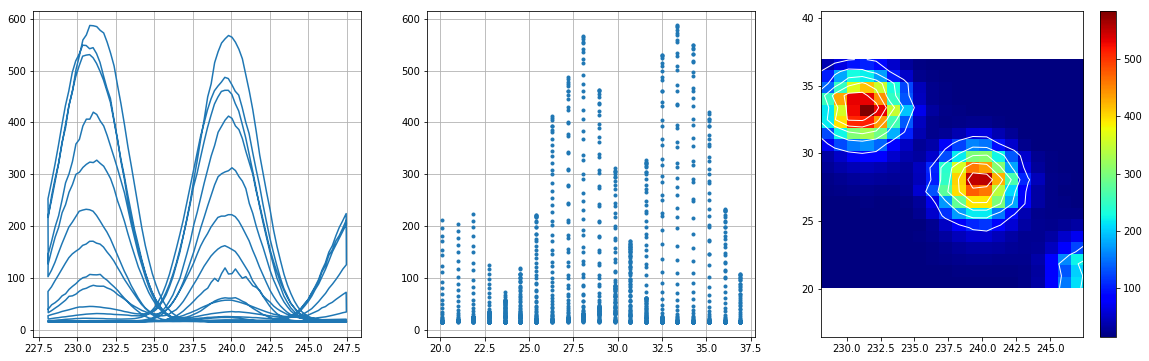

0.0 180.0 -180.0 180.0
The interval between parallels is 10 deg 0.00'.
The interval between meridians is 30 deg -0.00'.
76.80338855418589 103.19661144581411 -13.196611445814117 13.196611445814117
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 2 deg 0.00'.


/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:387: RuntimeWarning: invalid value encountered in greater
  w=np.where(d2 > threshold)[0]
/anaconda3/lib/python3.6/site-packages/healpy/projector.py:750: RuntimeWarning: invalid value encountered in greater
  mask = (np.asarray(x)**2+np.asarray(y)**2>1.0)


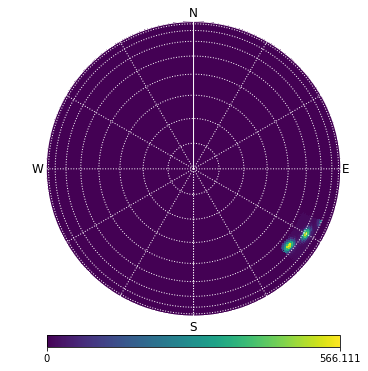

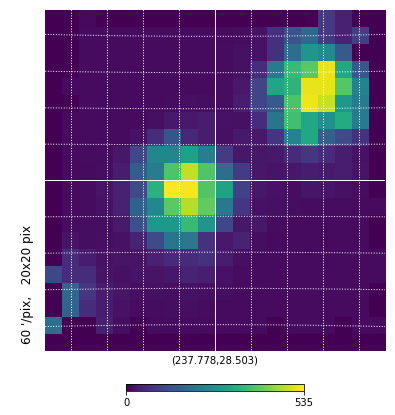

In [33]:
Mappit('map_Fri_Jun_15_16:11:43_2018.npz')

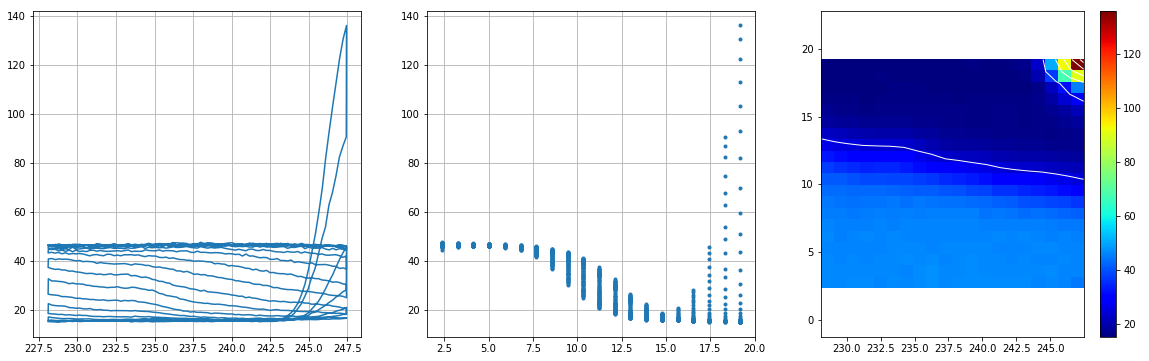

0.0 180.0 -180.0 180.0
The interval between parallels is 10 deg 0.00'.
The interval between meridians is 30 deg -0.00'.
76.80338855418589 103.19661144581411 -13.196611445814117 13.196611445814117
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 2 deg 0.00'.


/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:387: RuntimeWarning: invalid value encountered in greater
  w=np.where(d2 > threshold)[0]
/anaconda3/lib/python3.6/site-packages/healpy/projector.py:750: RuntimeWarning: invalid value encountered in greater
  mask = (np.asarray(x)**2+np.asarray(y)**2>1.0)


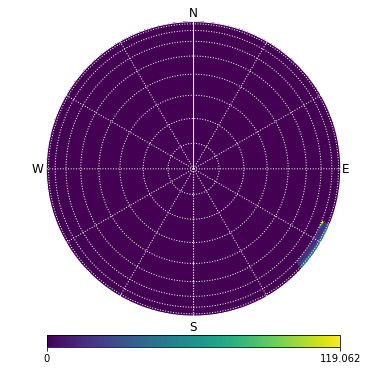

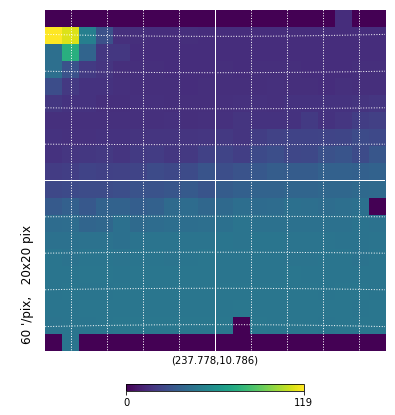

In [34]:
Mappit('map_Fri_Jun_15_16:15:01_2018.npz')

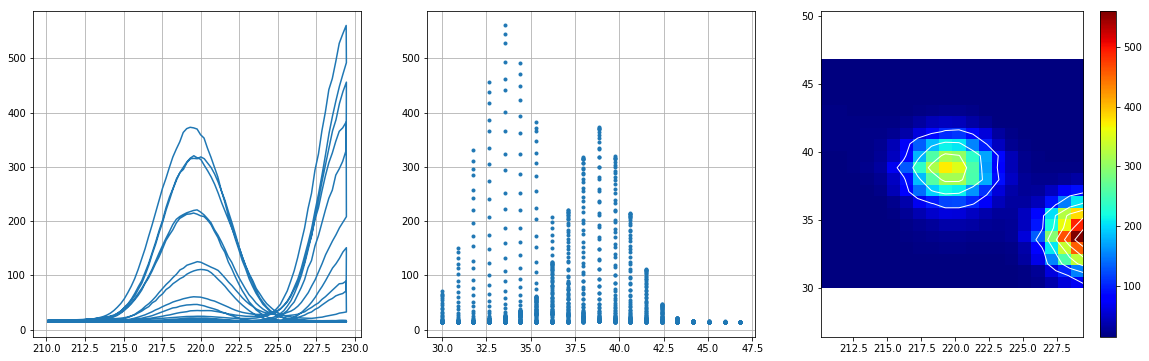

0.0 180.0 -180.0 180.0
The interval between parallels is 10 deg 0.00'.
The interval between meridians is 30 deg -0.00'.
76.80338855418589 103.19661144581411 -13.196611445814117 13.196611445814117
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 2 deg 0.00'.


/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:387: RuntimeWarning: invalid value encountered in greater
  w=np.where(d2 > threshold)[0]
/anaconda3/lib/python3.6/site-packages/healpy/projector.py:750: RuntimeWarning: invalid value encountered in greater
  mask = (np.asarray(x)**2+np.asarray(y)**2>1.0)


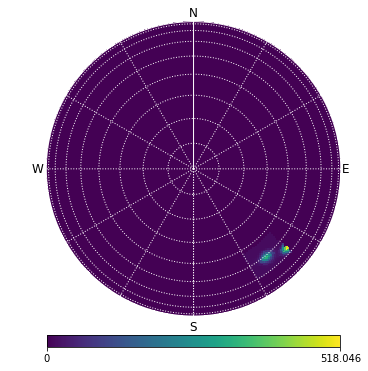

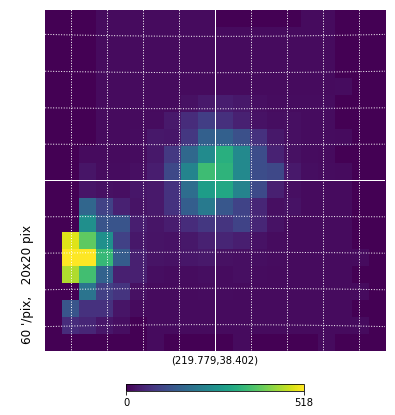

In [35]:
Mappit('map_Fri_Jun_15_16:25:13_2018.npz')

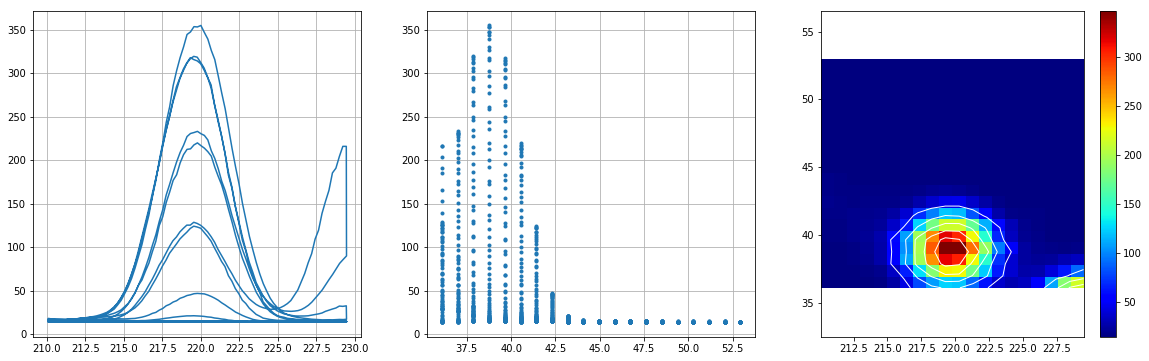

0.0 180.0 -180.0 180.0
The interval between parallels is 10 deg 0.00'.
The interval between meridians is 30 deg -0.00'.
76.80338855418589 103.19661144581411 -13.196611445814117 13.196611445814117
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 2 deg 0.00'.


/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:387: RuntimeWarning: invalid value encountered in greater
  w=np.where(d2 > threshold)[0]
/anaconda3/lib/python3.6/site-packages/healpy/projector.py:750: RuntimeWarning: invalid value encountered in greater
  mask = (np.asarray(x)**2+np.asarray(y)**2>1.0)


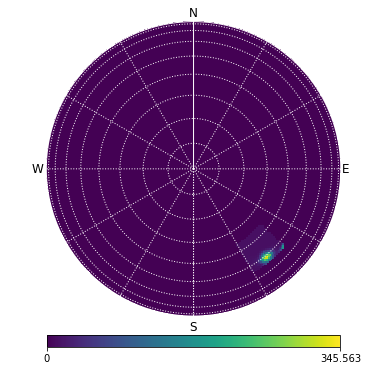

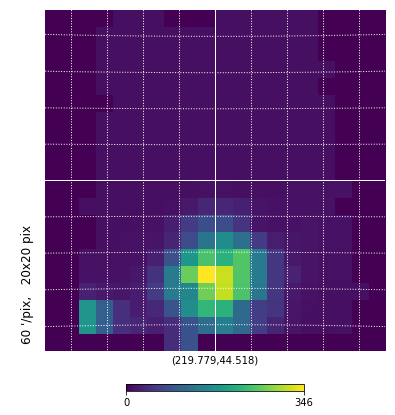

In [36]:
Mappit('map_Fri_Jun_15_16:31:47_2018.npz')

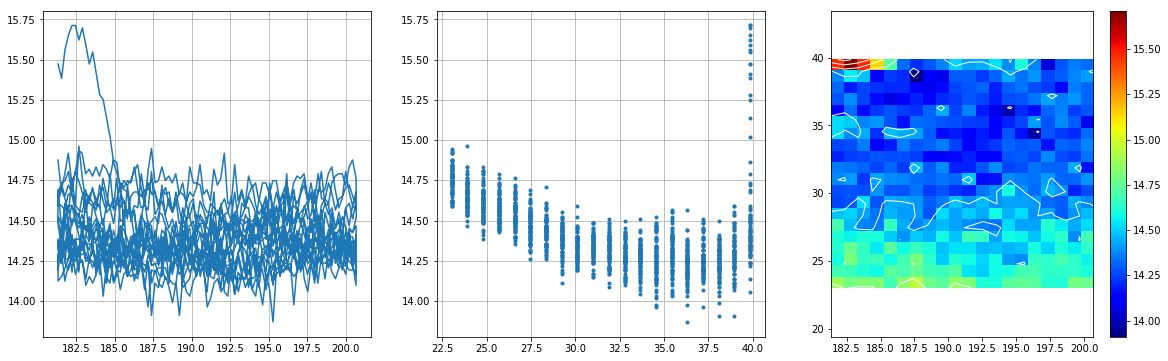

0.0 180.0 -180.0 180.0
The interval between parallels is 10 deg 0.00'.
The interval between meridians is 30 deg -0.00'.
76.80338855418589 103.19661144581411 -13.196611445814117 13.196611445814117
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 2 deg 0.00'.


/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:387: RuntimeWarning: invalid value encountered in greater
  w=np.where(d2 > threshold)[0]
/anaconda3/lib/python3.6/site-packages/healpy/projector.py:750: RuntimeWarning: invalid value encountered in greater
  mask = (np.asarray(x)**2+np.asarray(y)**2>1.0)


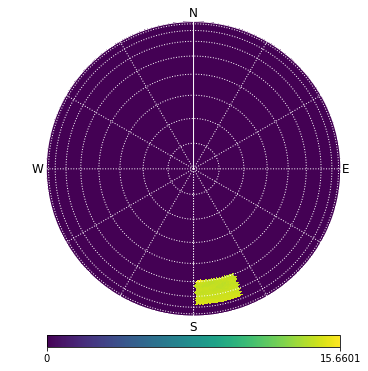

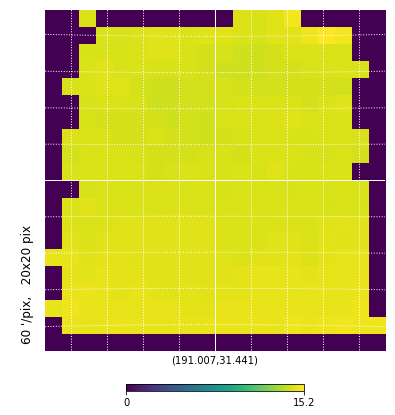

In [37]:
Mappit('map_Fri_Jun_15_16:46:43_2018.npz')